<a href="https://colab.research.google.com/github/natochres/Analise-de-dados/blob/main/Md_05_case_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Desafio do bootcamp de arquiteto bigdata**
Uma rede de varejo de supermercados está procurando aprimorar suas estratégias de marketing e vendas por meio da coleta e análise de dados dos clientes. Para alcançar esse objetivo, a empresa está buscando um profissional de arquitetura de Big Data capaz de coletar, tratar e armazenar dados de várias fontes e integrá-los em uma arquitetura ideal para análise
O profissional contratado deverá projetar e implementar uma infraestrutura de Big Data que seja capaz de coletar e armazenar grandes volumes de dados de clientes, como informações de compra, dados pessoais e produtos. Além disso, o profissional deve criar um pipeline de dados que possa tratar esses dados, integrando-os em uma arquitetura de armazenamento otimizada para análise.
O trabalho incluirá a escolha das ferramentas e tecnologias mais adequadas para a coleta, tratamento e armazenamento de dados, além de implementar técnicas de integração de dados para garantir a qualidade e confiabilidade dos dados. O profissional também deve implementar algoritmos de segmentação de mercado para ajudar a empresa a identificar perfis de clientes, necessidades e preferências específicas.
O resultado final deve ser um sistema que permita à empresa tomar decisões mais informadas sobre o marketing e a oferta de produtos e serviços, aumentando a satisfação do cliente e melhorando os resultados financeiros.

***Com essa análise, respondemos 8 perguntas que foram demandadas***

1 - Desvio Padrão dos valores de produto cuja a classe do alimento é 'Carnes e Frios'
R: 20.059154 </b>

2- Gráfico de Histograma das pessoas que são hipertensas e compram produtos da classe 'Carnes e Frios'
R: 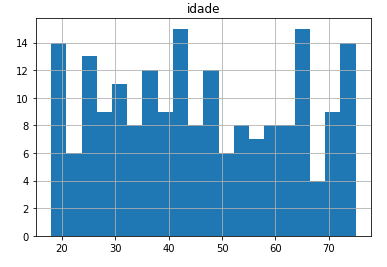

3 - Quantidade de registros presentes do primeiro cluster = "0"

R: 1361

4- Qual a proporção de homens e mulheres hipertensos que compraram produtosda classe "Alimentação"?

R: 50.48 para os homens e 49.52 para as mulheres

5- Gere o gráfico de análise de clusters com os centroides e selecione a opção querepresenta a imagem gerada.

R: 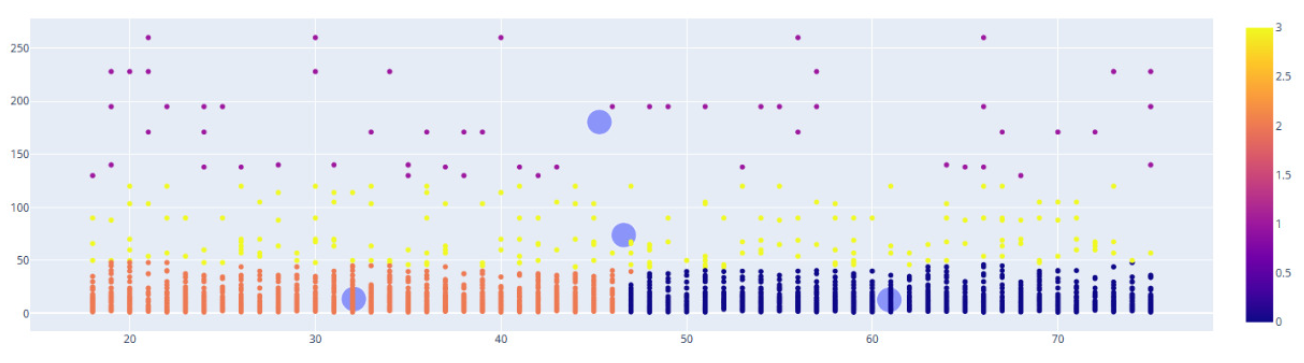

6- diagrama de boxplot entre asvariáveis quantidade de filhos e cluster.
R:

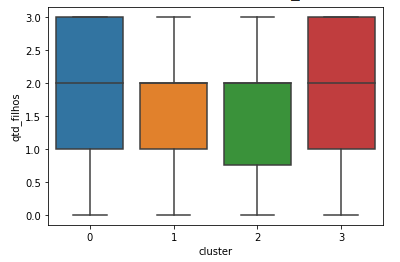

7- Qual é a quantidade de solteiros e não hipertensos estão presentes no cluster deidentificador 3?

R:20

8- Qual é o número total de não diabéticos para o cluster de identificador 0?

R:680


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import openpyxl
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import json

/content/drive/MyDrive/Colab Notebooks

In [11]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [12]:
DIR = '/content/drive/MyDrive/ColabNotebooks/'

In [13]:
estados = pd.read_csv(DIR + 'estados.txt', delimiter='|', encoding='latin-1')
estados.head()

,codigo_estado,nome_estado,sgl_estado
0,1,Acre,AC
1,2,Alagoas,AL
2,3,Amapá,AP
3,4,Amazonas,AM
4,5,Bahia,BA


In [29]:
clientes = pd.read_csv(DIR + 'clientes.csv', sep=';', encoding='latin-1')
clientes.head()


,ï»¿cod_cliente,sexo,idade,qtd_filhos,estado_civil,cod_estado,hipertenso,diabetes
0,1,1,26,2,3,13,0,1
1,2,1,58,0,2,2,0,0
2,3,1,63,1,3,11,1,1
3,4,1,58,2,2,11,1,1
4,5,0,70,0,1,5,0,1


In [32]:
compras = pd.read_excel(DIR + 'compras.xls', decimal=",")
compras.head(2)

,cod_cliente,cod_produto,qtd_produto,valor_unitario,valor_total_compra
0,1,1011,3,5.99,17.97
1,2,1032,4,9.99,39.96


In [33]:
clientes = clientes.rename(columns={'ï»¿cod_cliente' : 'cod_cliente'})

In [34]:
clientes = clientes.rename(columns={'sexo' : 'cod_sexo', 'estado_civil':'cod_estado_civil', 'hipertenso': 'cod_hipertenso', 'diabetes': 'cod_diabetes'})
clientes.head(2)

,cod_cliente,cod_sexo,idade,qtd_filhos,cod_estado_civil,cod_estado,cod_hipertenso,cod_diabetes
0,1,1,26,2,3,13,0,1
1,2,1,58,0,2,2,0,0


In [36]:
df_civil = pd.DataFrame({'cod_estado_civil': [0,1,2,3], 'estado_civil': ['solteiro(a)', 'casado(a)', 'viuvo(a)', 'divorciado(a)']})
df_civil.head()

,cod_estado_civil,estado_civil
0,0,solteiro(a)
1,1,casado(a)
2,2,viuvo(a)
3,3,divorciado(a)


In [37]:
df_hipertenso = pd.DataFrame({'cod_hipertenso': [0,1], 'hipertenso': ['Não hipertenso', 'hipertenso']})
df_hipertenso.head()

,cod_hipertenso,hipertenso
0,0,Não hipertenso
1,1,hipertenso


In [38]:
df_diabetes = pd.DataFrame({'cod_diabetes': [0,1], 'diabetes': ['Não diabetes', 'diabetes']})
df_diabetes.head()

,cod_diabetes,diabetes
0,0,Não diabetes
1,1,diabetes


In [41]:
df_sexo = pd.DataFrame({'cod_sexo': [0,1], 'sexo': ['Feminino', 'Masculino']})
df_sexo.head()

,cod_sexo,sexo
0,0,Feminino
1,1,Masculino


In [42]:
df_mescla = pd.merge(clientes, df_civil, on='cod_estado_civil', how='outer')

In [43]:
df_mescla = pd.merge(df_mescla, df_hipertenso, on='cod_hipertenso', how='outer' )

In [44]:
df_mescla = pd.merge(df_mescla, df_diabetes, on='cod_diabetes', how='outer')



In [45]:
df_mescla = pd.merge(df_mescla, df_sexo, on='cod_sexo', how='outer')

In [51]:

estados = estados.rename(columns={'codigo_estado' : 'cod_estado'})
df_clientes = pd.merge(df_mescla, estados, on='cod_estado', how='outer').sort_values('cod_cliente')
df_clientes.reset_index(drop=True)

,cod_cliente,cod_sexo,idade,qtd_filhos,cod_estado_civil,cod_estado,cod_hipertenso,cod_diabetes,estado_civil,hipertenso,diabetes,sexo,nome_estado,sgl_estado
0,1,1,26,2,3,13,0,1,divorciado(a),Não hipertenso,diabetes,Masculino,Minas Gerais,MG
1,2,1,58,0,2,2,0,0,viuvo(a),Não hipertenso,Não diabetes,Masculino,Alagoas,AL
2,3,1,63,1,3,11,1,1,divorciado(a),hipertenso,diabetes,Masculino,Mato Grosso,MT
3,4,1,58,2,2,11,1,1,viuvo(a),hipertenso,diabetes,Masculino,Mato Grosso,MT
4,5,0,70,0,1,5,0,1,casado(a),Não hipertenso,diabetes,Feminino,Bahia,BA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,2996,1,63,1,2,12,0,1,viuvo(a),Não hipertenso,diabetes,Masculino,Mato Grosso do Sul,MS
2996,2997,1,35,0,2,7,0,0,viuvo(a),Não hipertenso,Não diabetes,Masculino,Distrito Federal,DF
2997,2998,1,35,2,0,11,0,0,solteiro(a),Não hipertenso,Não diabetes,Masculino,Mato Grosso,MT
2998,2999,1,20,0,0,20,1,0,solteiro(a),hipertenso,Não diabetes,Masculino,Rio Grande do Norte,RN


In [52]:
compras.head(2)

,cod_cliente,cod_produto,qtd_produto,valor_unitario,valor_total_compra
0,1,1011,3,5.99,17.97
1,2,1032,4,9.99,39.96


In [53]:
df_clientes.head(2)

,cod_cliente,cod_sexo,idade,qtd_filhos,cod_estado_civil,cod_estado,cod_hipertenso,cod_diabetes,estado_civil,hipertenso,diabetes,sexo,nome_estado,sgl_estado
0,1,1,26,2,3,13,0,1,divorciado(a),Não hipertenso,diabetes,Masculino,Minas Gerais,MG
833,2,1,58,0,2,2,0,0,viuvo(a),Não hipertenso,Não diabetes,Masculino,Alagoas,AL


In [56]:
produtos = pd.read_excel(DIR + 'produtos.xlsx', decimal=",")
produtos.head(2)

,cod_produto,nome_produto,cod_classe_produto,classe_produto,valor
0,1000,Sabão em pó,1,Produtos de Limpeza,9.9
1,1001,Amaciante,1,Produtos de Limpeza,22.0


In [58]:
df_compras = pd.merge(compras, produtos, on='cod_produto', how='outer')
df_compras

,cod_cliente,cod_produto,qtd_produto,valor_unitario,valor_total_compra,nome_produto,cod_classe_produto,classe_produto,valor
0,1,1011,3,5.99,17.97,Lustra móveis,1,Produtos de Limpeza,5.99
1,65,1011,3,5.99,17.97,Lustra móveis,1,Produtos de Limpeza,5.99
2,126,1011,1,5.99,5.99,Lustra móveis,1,Produtos de Limpeza,5.99
3,310,1011,3,5.99,17.97,Lustra móveis,1,Produtos de Limpeza,5.99
4,313,1011,4,5.99,23.96,Lustra móveis,1,Produtos de Limpeza,5.99
...,...,...,...,...,...,...,...,...,...
2985,2377,1015,3,12.00,36.00,Saco de lixo 30l,1,Produtos de Limpeza,12.00
2986,2497,1015,1,12.00,12.00,Saco de lixo 30l,1,Produtos de Limpeza,12.00
2987,2709,1015,4,12.00,48.00,Saco de lixo 30l,1,Produtos de Limpeza,12.00
2988,2785,1015,1,12.00,12.00,Saco de lixo 30l,1,Produtos de Limpeza,12.00


In [59]:
df_desafio = pd.merge(df_clientes, df_compras, on='cod_cliente', how='outer').sort_values('cod_cliente')
df_desafio.reset_index(drop=True)

df_desafio

,cod_cliente,cod_sexo,idade,qtd_filhos,cod_estado_civil,cod_estado,cod_hipertenso,cod_diabetes,estado_civil,hipertenso,...,nome_estado,sgl_estado,cod_produto,qtd_produto,valor_unitario,valor_total_compra,nome_produto,cod_classe_produto,classe_produto,valor
0,1,1,26,2,3,13,0,1,divorciado(a),Não hipertenso,...,Minas Gerais,MG,1011.0,3.0,5.99,17.97,Lustra móveis,1.0,Produtos de Limpeza,5.99
1,2,1,58,0,2,2,0,0,viuvo(a),Não hipertenso,...,Alagoas,AL,1032.0,4.0,9.99,39.96,Café,3.0,Alimentação,9.99
2,3,1,63,1,3,11,1,1,divorciado(a),hipertenso,...,Mato Grosso,MT,1049.0,2.0,5.99,11.98,Leite em pó,3.0,Alimentação,5.99
3,4,1,58,2,2,11,1,1,viuvo(a),hipertenso,...,Mato Grosso,MT,1021.0,4.0,3.99,15.96,Leite integral litro,2.0,Bebidas,3.99
4,5,0,70,0,1,5,0,1,casado(a),Não hipertenso,...,Bahia,BA,1001.0,4.0,22.00,88.00,Amaciante,1.0,Produtos de Limpeza,22.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,2996,1,63,1,2,12,0,1,viuvo(a),Não hipertenso,...,Mato Grosso do Sul,MS,1046.0,4.0,4.99,19.96,Goiabada,3.0,Alimentação,4.99
2996,2997,1,35,0,2,7,0,0,viuvo(a),Não hipertenso,...,Distrito Federal,DF,1021.0,1.0,3.99,3.99,Leite integral litro,2.0,Bebidas,3.99
2997,2998,1,35,2,0,11,0,0,solteiro(a),Não hipertenso,...,Mato Grosso,MT,1075.0,4.0,35.00,140.00,Queijo Minas,5.0,Carnes e Frios,35.00
2998,2999,1,20,0,0,20,1,0,solteiro(a),hipertenso,...,Rio Grande do Norte,RN,1002.0,3.0,1.99,5.97,Detergente,1.0,Produtos de Limpeza,1.99


In [60]:
df_desafio.isna().sum()

cod_cliente            0
cod_sexo               0
idade                  0
qtd_filhos             0
cod_estado_civil       0
cod_estado             0
cod_hipertenso         0
cod_diabetes           0
estado_civil           0
hipertenso             0
diabetes               0
sexo                   0
nome_estado            0
sgl_estado             0
cod_produto           10
qtd_produto           10
valor_unitario        10
valor_total_compra    10
nome_produto          10
cod_classe_produto    10
classe_produto        10
valor                 10
dtype: int64

In [62]:
df_desafio.dropna(subset=['cod_produto'], inplace=True)
df_desafio

,cod_cliente,cod_sexo,idade,qtd_filhos,cod_estado_civil,cod_estado,cod_hipertenso,cod_diabetes,estado_civil,hipertenso,...,nome_estado,sgl_estado,cod_produto,qtd_produto,valor_unitario,valor_total_compra,nome_produto,cod_classe_produto,classe_produto,valor
0,1,1,26,2,3,13,0,1,divorciado(a),Não hipertenso,...,Minas Gerais,MG,1011.0,3.0,5.99,17.97,Lustra móveis,1.0,Produtos de Limpeza,5.99
1,2,1,58,0,2,2,0,0,viuvo(a),Não hipertenso,...,Alagoas,AL,1032.0,4.0,9.99,39.96,Café,3.0,Alimentação,9.99
2,3,1,63,1,3,11,1,1,divorciado(a),hipertenso,...,Mato Grosso,MT,1049.0,2.0,5.99,11.98,Leite em pó,3.0,Alimentação,5.99
3,4,1,58,2,2,11,1,1,viuvo(a),hipertenso,...,Mato Grosso,MT,1021.0,4.0,3.99,15.96,Leite integral litro,2.0,Bebidas,3.99
4,5,0,70,0,1,5,0,1,casado(a),Não hipertenso,...,Bahia,BA,1001.0,4.0,22.00,88.00,Amaciante,1.0,Produtos de Limpeza,22.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,2996,1,63,1,2,12,0,1,viuvo(a),Não hipertenso,...,Mato Grosso do Sul,MS,1046.0,4.0,4.99,19.96,Goiabada,3.0,Alimentação,4.99
2996,2997,1,35,0,2,7,0,0,viuvo(a),Não hipertenso,...,Distrito Federal,DF,1021.0,1.0,3.99,3.99,Leite integral litro,2.0,Bebidas,3.99
2997,2998,1,35,2,0,11,0,0,solteiro(a),Não hipertenso,...,Mato Grosso,MT,1075.0,4.0,35.00,140.00,Queijo Minas,5.0,Carnes e Frios,35.00
2998,2999,1,20,0,0,20,1,0,solteiro(a),hipertenso,...,Rio Grande do Norte,RN,1002.0,3.0,1.99,5.97,Detergente,1.0,Produtos de Limpeza,1.99


In [63]:
df_desafio.reset_index(drop=True)
df_desafio

,cod_cliente,cod_sexo,idade,qtd_filhos,cod_estado_civil,cod_estado,cod_hipertenso,cod_diabetes,estado_civil,hipertenso,...,nome_estado,sgl_estado,cod_produto,qtd_produto,valor_unitario,valor_total_compra,nome_produto,cod_classe_produto,classe_produto,valor
0,1,1,26,2,3,13,0,1,divorciado(a),Não hipertenso,...,Minas Gerais,MG,1011.0,3.0,5.99,17.97,Lustra móveis,1.0,Produtos de Limpeza,5.99
1,2,1,58,0,2,2,0,0,viuvo(a),Não hipertenso,...,Alagoas,AL,1032.0,4.0,9.99,39.96,Café,3.0,Alimentação,9.99
2,3,1,63,1,3,11,1,1,divorciado(a),hipertenso,...,Mato Grosso,MT,1049.0,2.0,5.99,11.98,Leite em pó,3.0,Alimentação,5.99
3,4,1,58,2,2,11,1,1,viuvo(a),hipertenso,...,Mato Grosso,MT,1021.0,4.0,3.99,15.96,Leite integral litro,2.0,Bebidas,3.99
4,5,0,70,0,1,5,0,1,casado(a),Não hipertenso,...,Bahia,BA,1001.0,4.0,22.00,88.00,Amaciante,1.0,Produtos de Limpeza,22.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,2996,1,63,1,2,12,0,1,viuvo(a),Não hipertenso,...,Mato Grosso do Sul,MS,1046.0,4.0,4.99,19.96,Goiabada,3.0,Alimentação,4.99
2996,2997,1,35,0,2,7,0,0,viuvo(a),Não hipertenso,...,Distrito Federal,DF,1021.0,1.0,3.99,3.99,Leite integral litro,2.0,Bebidas,3.99
2997,2998,1,35,2,0,11,0,0,solteiro(a),Não hipertenso,...,Mato Grosso,MT,1075.0,4.0,35.00,140.00,Queijo Minas,5.0,Carnes e Frios,35.00
2998,2999,1,20,0,0,20,1,0,solteiro(a),hipertenso,...,Rio Grande do Norte,RN,1002.0,3.0,1.99,5.97,Detergente,1.0,Produtos de Limpeza,1.99


In [64]:
df_desafio.isna().sum()

cod_cliente           0
cod_sexo              0
idade                 0
qtd_filhos            0
cod_estado_civil      0
cod_estado            0
cod_hipertenso        0
cod_diabetes          0
estado_civil          0
hipertenso            0
diabetes              0
sexo                  0
nome_estado           0
sgl_estado            0
cod_produto           0
qtd_produto           0
valor_unitario        0
valor_total_compra    0
nome_produto          0
cod_classe_produto    0
classe_produto        0
valor                 0
dtype: int64

In [65]:
df_desafio.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2990 entries, 0 to 2999
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   cod_cliente         2990 non-null   int64  
 1   cod_sexo            2990 non-null   int64  
 2   idade               2990 non-null   int64  
 3   qtd_filhos          2990 non-null   int64  
 4   cod_estado_civil    2990 non-null   int64  
 5   cod_estado          2990 non-null   int64  
 6   cod_hipertenso      2990 non-null   int64  
 7   cod_diabetes        2990 non-null   int64  
 8   estado_civil        2990 non-null   object 
 9   hipertenso          2990 non-null   object 
 10  diabetes            2990 non-null   object 
 11  sexo                2990 non-null   object 
 12  nome_estado         2990 non-null   object 
 13  sgl_estado          2990 non-null   object 
 14  cod_produto         2990 non-null   float64
 15  qtd_produto         2990 non-null   float64
 16  valor_

In [66]:
histgrama_tenso_frio = df_desafio[(df_desafio.cod_hipertenso==1) & (df_desafio.classe_produto=="Carnes e Frios")]

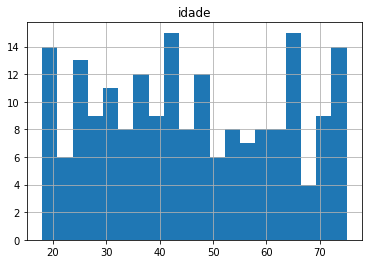

In [67]:
histgrama_tenso_frio.hist(column='idade',bins=20)
plt.show()

In [68]:
df_desafio.describe()

,cod_cliente,cod_sexo,idade,qtd_filhos,cod_estado_civil,cod_estado,cod_hipertenso,cod_diabetes,cod_produto,qtd_produto,valor_unitario,valor_total_compra,cod_classe_produto,valor
count,2990.000000,2990.000000,2990.000000,2990.000000,2990.000000,2990.000000,2990.000000,2990.000000,2990.000000,2990.000000,2990.000000,2990.000000,2990.000000,2990.000000
mean,1502.530435,0.498328,46.541806,1.522408,1.496990,13.819732,0.497659,0.508027,1043.261873,2.510368,8.486793,21.130284,3.085619,8.486793
std,866.892101,0.500081,16.622411,1.117996,1.096769,7.781988,0.500078,0.500019,24.969114,1.118771,10.779151,30.432766,1.274880,10.779151
min,1.000000,0.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1000.000000,1.000000,1.250000,1.250000,1.000000,1.250000
25%,748.250000,0.000000,32.000000,1.000000,1.000000,7.000000,0.000000,0.000000,1022.000000,2.000000,3.500000,6.000000,2.000000,3.500000
50%,1505.500000,0.000000,47.000000,2.000000,1.000000,14.000000,0.000000,1.000000,1043.000000,3.000000,4.990000,11.980000,3.000000,4.990000
75%,2252.750000,1.000000,61.000000,3.000000,2.000000,20.000000,1.000000,1.000000,1065.000000,4.000000,8.990000,22.500000,4.000000,8.990000
max,3000.000000,1.000000,75.000000,3.000000,3.000000,27.000000,1.000000,1.000000,1086.000000,4.000000,64.990000,259.960000,5.000000,64.990000


In [72]:
std_carnes = df_desafio[(df_desafio.classe_produto=='Carnes e Frios')]
std_carnes.describe()

,cod_cliente,cod_sexo,idade,qtd_filhos,cod_estado_civil,cod_estado,cod_hipertenso,cod_diabetes,cod_produto,qtd_produto,valor_unitario,valor_total_compra,cod_classe_produto,valor
count,410.000000,410.000000,410.000000,410.000000,410.000000,410.000000,410.000000,410.000000,410.000000,410.000000,410.000000,410.000000,410.0,410.000000
mean,1509.702439,0.492683,46.724390,1.539024,1.507317,14.326829,0.478049,0.519512,1080.426829,2.492683,25.784902,63.068098,5.0,25.784902
std,871.135026,0.500557,16.598955,1.133913,1.101763,7.919245,0.500128,0.500230,3.472668,1.121558,20.059154,60.648498,0.0,20.059154
min,16.000000,0.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1075.000000,1.000000,1.990000,1.990000,5.0,1.990000
25%,776.750000,0.000000,33.000000,0.250000,1.000000,7.000000,0.000000,0.000000,1077.000000,1.000000,5.990000,15.900000,5.0,5.990000
50%,1509.500000,0.000000,45.000000,2.000000,2.000000,14.500000,0.000000,1.000000,1080.000000,3.000000,29.990000,35.000000,5.0,29.990000
75%,2256.750000,1.000000,62.000000,3.000000,2.000000,21.000000,1.000000,1.000000,1083.000000,3.000000,35.000000,103.500000,5.0,35.000000
max,2998.000000,1.000000,75.000000,3.000000,3.000000,27.000000,1.000000,1.000000,1086.000000,4.000000,64.990000,259.960000,5.0,64.990000


In [73]:
def calcular_wcss(dados_cliente):
    wcss = []
    for k in range(1,11):
        print(k)
        kmeans = KMeans(n_clusters = k, random_state=0)
        kmeans.fit(X=dados_cliente)        
        wcss.append(kmeans.inertia_)
    return wcss

In [74]:
dados_cliente = df_desafio[['idade', 'valor_total_compra']]
dados_cliente.head(2)

,idade,valor_total_compra
0,26,17.97
1,58,39.96


In [75]:
wcss_clientes = calcular_wcss(dados_cliente)

1
2
3


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


4
5
6
7


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

8
9
10


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [76]:
for i in range(len(wcss_clientes)):
  print(f'O cluster {i} possui valor de WCSS de: {wcss_clientes[i]}')

O cluster 0 possui valor de WCSS de: 3594146.3889058544
O cluster 1 possui valor de WCSS de: 1665877.0056578135
O cluster 2 possui valor de WCSS de: 1077628.4135660413
O cluster 3 possui valor de WCSS de: 724846.9305424874
O cluster 4 possui valor de WCSS de: 533118.5850935788
O cluster 5 possui valor de WCSS de: 442353.22539955506
O cluster 6 possui valor de WCSS de: 378911.9084614109
O cluster 7 possui valor de WCSS de: 332278.12607532105
O cluster 8 possui valor de WCSS de: 304611.2308148909
O cluster 9 possui valor de WCSS de: 272074.7956325874


In [77]:
import plotly.express as px  #Criação de graficos dinâmnicos
import plotly.offline as py
import plotly.graph_objects as go #Para criação e concatenização de graficos

In [78]:
grafico_wcss = px.line( x= range(1,11),
                        y=wcss_clientes
                       )
fig = go.Figure(grafico_wcss)

fig.update_layout(title='Calculando o WCSS',
                  xaxis_title= 'Número de clusters',
                  yaxis_title= 'Valor do Wcss', 
                  template =  'plotly_white'
                  ) 

fig.show()

In [79]:
kmeans_clientes = KMeans(n_clusters=4, random_state=0)
df_desafio['cluster'] = kmeans_clientes.fit_predict(dados_cliente)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [80]:
df_desafio

,cod_cliente,cod_sexo,idade,qtd_filhos,cod_estado_civil,cod_estado,cod_hipertenso,cod_diabetes,estado_civil,hipertenso,...,sgl_estado,cod_produto,qtd_produto,valor_unitario,valor_total_compra,nome_produto,cod_classe_produto,classe_produto,valor,cluster
0,1,1,26,2,3,13,0,1,divorciado(a),Não hipertenso,...,MG,1011.0,3.0,5.99,17.97,Lustra móveis,1.0,Produtos de Limpeza,5.99,2
1,2,1,58,0,2,2,0,0,viuvo(a),Não hipertenso,...,AL,1032.0,4.0,9.99,39.96,Café,3.0,Alimentação,9.99,0
2,3,1,63,1,3,11,1,1,divorciado(a),hipertenso,...,MT,1049.0,2.0,5.99,11.98,Leite em pó,3.0,Alimentação,5.99,0
3,4,1,58,2,2,11,1,1,viuvo(a),hipertenso,...,MT,1021.0,4.0,3.99,15.96,Leite integral litro,2.0,Bebidas,3.99,0
4,5,0,70,0,1,5,0,1,casado(a),Não hipertenso,...,BA,1001.0,4.0,22.00,88.00,Amaciante,1.0,Produtos de Limpeza,22.00,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,2996,1,63,1,2,12,0,1,viuvo(a),Não hipertenso,...,MS,1046.0,4.0,4.99,19.96,Goiabada,3.0,Alimentação,4.99,0
2996,2997,1,35,0,2,7,0,0,viuvo(a),Não hipertenso,...,DF,1021.0,1.0,3.99,3.99,Leite integral litro,2.0,Bebidas,3.99,2
2997,2998,1,35,2,0,11,0,0,solteiro(a),Não hipertenso,...,MT,1075.0,4.0,35.00,140.00,Queijo Minas,5.0,Carnes e Frios,35.00,1
2998,2999,1,20,0,0,20,1,0,solteiro(a),hipertenso,...,RN,1002.0,3.0,1.99,5.97,Detergente,1.0,Produtos de Limpeza,1.99,2


In [81]:
df_desafio.head(2)

,cod_cliente,cod_sexo,idade,qtd_filhos,cod_estado_civil,cod_estado,cod_hipertenso,cod_diabetes,estado_civil,hipertenso,...,sgl_estado,cod_produto,qtd_produto,valor_unitario,valor_total_compra,nome_produto,cod_classe_produto,classe_produto,valor,cluster
0,1,1,26,2,3,13,0,1,divorciado(a),Não hipertenso,...,MG,1011.0,3.0,5.99,17.97,Lustra móveis,1.0,Produtos de Limpeza,5.99,2
1,2,1,58,0,2,2,0,0,viuvo(a),Não hipertenso,...,AL,1032.0,4.0,9.99,39.96,Café,3.0,Alimentação,9.99,0


In [82]:
cluster_zero = df_desafio[(df_desafio.cluster==0)]
cluster_zero.describe()

,cod_cliente,cod_sexo,idade,qtd_filhos,cod_estado_civil,cod_estado,cod_hipertenso,cod_diabetes,cod_produto,qtd_produto,valor_unitario,valor_total_compra,cod_classe_produto,valor,cluster
count,1361.000000,1361.000000,1361.000000,1361.000000,1361.000000,1361.000000,1361.000000,1361.000000,1361.000000,1361.000000,1361.000000,1361.000000,1361.000000,1361.000000,1361.0
mean,1513.481264,0.509184,60.916973,1.521675,1.481264,13.803086,0.488611,0.500367,1041.726672,2.424688,5.750287,12.886201,3.005878,5.750287,0.0
std,875.809307,0.500099,8.133881,1.112632,1.083897,7.871450,0.500054,0.500184,23.389545,1.110952,4.683980,9.184338,1.186924,4.683980,0.0
min,2.000000,0.000000,47.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1000.000000,1.000000,1.250000,1.250000,1.000000,1.250000,0.0
25%,728.000000,0.000000,54.000000,1.000000,1.000000,7.000000,0.000000,0.000000,1022.000000,1.000000,3.490000,5.990000,2.000000,3.490000,0.0
50%,1521.000000,1.000000,61.000000,2.000000,1.000000,14.000000,0.000000,1.000000,1043.000000,2.000000,4.000000,10.990000,3.000000,4.000000,0.0
75%,2282.000000,1.000000,68.000000,3.000000,2.000000,21.000000,1.000000,1.000000,1061.000000,3.000000,5.990000,17.000000,4.000000,5.990000,0.0
max,3000.000000,1.000000,75.000000,3.000000,3.000000,27.000000,1.000000,1.000000,1086.000000,4.000000,35.000000,48.000000,5.000000,35.000000,0.0


In [85]:
centroides_clusters = kmeans_clientes.cluster_centers_
centroides_clusters

array([[ 60.91697281,  12.88620132],
       [ 45.3       , 180.42616667],
       [ 32.07195846,  13.7052003 ],
       [ 46.61085973,  73.94230769]])

In [87]:
grafico = px.scatter(x = df_desafio['idade'], 
                            y = df_desafio['valor_total_compra'], 
                            color= df_desafio['cluster'])

grafico_centroide = px.scatter(x=centroides_clusters[:,0], y=centroides_clusters[:,1], size=[7,7,7,7])
grafico_final_petala = go.Figure(data=grafico.data + grafico_centroide.data)
grafico_final_petala.show()

In [90]:
agrupamento_cluster_zero = df_desafio[(df_desafio.cluster==0) & (df_desafio.valor_total_compra)]
agrupamento_cluster_zero.describe()


,cod_cliente,cod_sexo,idade,qtd_filhos,cod_estado_civil,cod_estado,cod_hipertenso,cod_diabetes,cod_produto,qtd_produto,valor_unitario,valor_total_compra,cod_classe_produto,valor,cluster
count,1361.000000,1361.000000,1361.000000,1361.000000,1361.000000,1361.000000,1361.000000,1361.000000,1361.000000,1361.000000,1361.000000,1361.000000,1361.000000,1361.000000,1361.0
mean,1513.481264,0.509184,60.916973,1.521675,1.481264,13.803086,0.488611,0.500367,1041.726672,2.424688,5.750287,12.886201,3.005878,5.750287,0.0
std,875.809307,0.500099,8.133881,1.112632,1.083897,7.871450,0.500054,0.500184,23.389545,1.110952,4.683980,9.184338,1.186924,4.683980,0.0
min,2.000000,0.000000,47.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1000.000000,1.000000,1.250000,1.250000,1.000000,1.250000,0.0
25%,728.000000,0.000000,54.000000,1.000000,1.000000,7.000000,0.000000,0.000000,1022.000000,1.000000,3.490000,5.990000,2.000000,3.490000,0.0
50%,1521.000000,1.000000,61.000000,2.000000,1.000000,14.000000,0.000000,1.000000,1043.000000,2.000000,4.000000,10.990000,3.000000,4.000000,0.0
75%,2282.000000,1.000000,68.000000,3.000000,2.000000,21.000000,1.000000,1.000000,1061.000000,3.000000,5.990000,17.000000,4.000000,5.990000,0.0
max,3000.000000,1.000000,75.000000,3.000000,3.000000,27.000000,1.000000,1.000000,1086.000000,4.000000,35.000000,48.000000,5.000000,35.000000,0.0


In [91]:
agrupamento_cluster_one = df_desafio[(df_desafio.cluster==1) & (df_desafio.valor_total_compra)]
agrupamento_cluster_one.describe()

,cod_cliente,cod_sexo,idade,qtd_filhos,cod_estado_civil,cod_estado,cod_hipertenso,cod_diabetes,cod_produto,qtd_produto,valor_unitario,valor_total_compra,cod_classe_produto,valor,cluster
count,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.0,60.000000,60.0
mean,1630.983333,0.466667,45.300000,1.516667,1.583333,14.316667,0.450000,0.416667,1082.433333,3.383333,54.759167,180.426167,5.0,54.759167,1.0
std,865.368257,0.503098,18.938169,1.065510,1.124333,7.836230,0.501692,0.497167,3.765889,0.666172,12.166030,40.550644,0.0,12.166030,0.0
min,16.000000,0.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1075.000000,2.000000,34.500000,129.980000,5.0,34.500000,1.0
25%,959.250000,0.000000,29.500000,1.000000,0.750000,8.750000,0.000000,0.000000,1082.250000,3.000000,51.492500,140.000000,5.0,51.492500,1.0
50%,1785.500000,0.000000,41.500000,2.000000,2.000000,13.500000,0.000000,0.000000,1084.000000,3.000000,56.990000,170.970000,5.0,56.990000,1.0
75%,2329.250000,1.000000,65.250000,2.000000,2.250000,21.250000,1.000000,1.000000,1085.000000,4.000000,64.990000,194.970000,5.0,64.990000,1.0
max,2998.000000,1.000000,75.000000,3.000000,3.000000,27.000000,1.000000,1.000000,1085.000000,4.000000,64.990000,259.960000,5.0,64.990000,1.0


In [92]:
agrupamento_cluster_two = df_desafio[(df_desafio.cluster==2) & (df_desafio.valor_total_compra)]
agrupamento_cluster_two.describe()

,cod_cliente,cod_sexo,idade,qtd_filhos,cod_estado_civil,cod_estado,cod_hipertenso,cod_diabetes,cod_produto,qtd_produto,valor_unitario,valor_total_compra,cod_classe_produto,valor,cluster
count,1348.000000,1348.000000,1348.000000,1348.000000,1348.000000,1348.000000,1348.000000,1348.000000,1348.000000,1348.000000,1348.000000,1348.000000,1348.000000,1348.000000,1348.0
mean,1496.681751,0.486647,32.071958,1.507418,1.509644,13.900593,0.509644,0.514837,1040.781899,2.459199,6.032641,13.705200,2.959199,6.032641,2.0
std,858.606160,0.500007,8.358611,1.115766,1.113084,7.636833,0.500093,0.499965,23.537171,1.115044,5.019214,9.822997,1.204038,5.019214,0.0
min,1.000000,0.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1000.000000,1.000000,1.250000,1.250000,1.000000,1.250000,2.0
25%,771.250000,0.000000,25.000000,0.750000,1.000000,7.000000,0.000000,0.000000,1021.000000,1.000000,3.490000,5.990000,2.000000,3.490000,2.0
50%,1494.000000,0.000000,32.000000,2.000000,1.000000,14.000000,1.000000,1.000000,1041.000000,2.000000,4.300000,11.960000,3.000000,4.300000,2.0
75%,2239.250000,1.000000,39.000000,2.000000,3.000000,20.000000,1.000000,1.000000,1061.000000,3.000000,7.500000,17.980000,4.000000,7.500000,2.0
max,2999.000000,1.000000,47.000000,3.000000,3.000000,27.000000,1.000000,1.000000,1086.000000,4.000000,35.000000,48.000000,5.000000,35.000000,2.0


In [93]:
agrupamento_cluster_tree = df_desafio[(df_desafio.cluster==3) & (df_desafio.valor_total_compra)]
agrupamento_cluster_tree.describe()

,cod_cliente,cod_sexo,idade,qtd_filhos,cod_estado_civil,cod_estado,cod_hipertenso,cod_diabetes,cod_produto,qtd_produto,valor_unitario,valor_total_compra,cod_classe_produto,valor,cluster
count,221.000000,221.000000,221.000000,221.000000,221.000000,221.000000,221.000000,221.000000,221.000000,221.000000,221.000000,221.000000,221.000000,221.000000,221.0
mean,1435.891403,0.511312,46.610860,1.619910,1.493213,13.294118,0.493213,0.538462,1057.208145,3.113122,27.745792,73.942308,3.828054,27.745792,3.0
std,862.565037,0.501007,16.103152,1.179508,1.072889,8.112808,0.501089,0.499650,32.042332,1.004924,14.465908,23.436634,1.675310,14.465908,0.0
min,5.000000,0.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1001.000000,1.000000,10.990000,43.960000,1.000000,10.990000,3.0
25%,693.000000,0.000000,33.000000,1.000000,1.000000,6.000000,0.000000,0.000000,1023.000000,2.000000,15.000000,54.000000,3.000000,15.000000,3.0
50%,1370.000000,1.000000,47.000000,2.000000,1.000000,13.000000,0.000000,1.000000,1076.000000,3.000000,29.990000,66.000000,5.000000,29.990000,3.0
75%,2189.000000,1.000000,60.000000,3.000000,2.000000,20.000000,1.000000,1.000000,1082.000000,4.000000,34.500000,89.970000,5.000000,34.500000,3.0
max,2992.000000,1.000000,75.000000,3.000000,3.000000,27.000000,1.000000,1.000000,1086.000000,4.000000,64.990000,119.960000,5.000000,64.990000,3.0


In [94]:
import seaborn as sns

<Axes: xlabel='cluster', ylabel='qtd_filhos'>

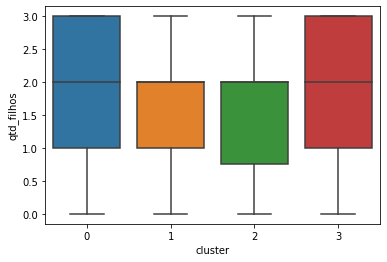

In [96]:
sns.boxplot(x='cluster', y='qtd_filhos', data=df_desafio)

In [97]:
agrupamento_solteiro_nhiper = agrupamento_cluster_tree[(agrupamento_cluster_tree.cluster==3) & (agrupamento_cluster_tree.cod_estado_civil==0) & (agrupamento_cluster_tree.cod_hipertenso==0)]
agrupamento_solteiro_nhiper.describe()

,cod_cliente,cod_sexo,idade,qtd_filhos,cod_estado_civil,cod_estado,cod_hipertenso,cod_diabetes,cod_produto,qtd_produto,valor_unitario,valor_total_compra,cod_classe_produto,valor,cluster
count,20.000000,20.000000,20.000000,20.000000,20.0,20.000000,20.0,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.0
mean,1387.100000,0.550000,46.750000,2.150000,0.0,13.300000,0.0,0.550000,1056.850000,3.150000,24.086000,67.678500,3.800000,24.086000,3.0
std,755.702873,0.510418,14.223313,1.136708,0.0,8.329403,0.0,0.510418,32.648487,0.875094,11.369287,19.395686,1.735087,11.369287,0.0
min,220.000000,0.000000,25.000000,0.000000,0.0,1.000000,0.0,0.000000,1001.000000,1.000000,10.990000,43.960000,1.000000,10.990000,3.0
25%,839.750000,0.000000,36.500000,1.750000,0.0,5.750000,0.0,0.000000,1021.250000,3.000000,14.625000,53.000000,2.500000,14.625000,3.0
50%,1302.000000,1.000000,46.000000,3.000000,0.0,12.000000,0.0,1.000000,1075.500000,3.000000,22.250000,64.800000,5.000000,22.250000,3.0
75%,2066.500000,1.000000,59.250000,3.000000,0.0,20.250000,0.0,1.000000,1079.000000,4.000000,29.990000,74.992500,5.000000,29.990000,3.0
max,2730.000000,1.000000,69.000000,3.000000,0.0,27.000000,0.0,1.000000,1086.000000,4.000000,56.990000,119.960000,5.000000,56.990000,3.0


In [101]:
agrupamento_ndiabetes = df_desafio[(df_desafio.cod_diabetes==0) & (df_desafio.cluster==0)]
agrupamento_ndiabetes.count()

cod_cliente           680
cod_sexo              680
idade                 680
qtd_filhos            680
cod_estado_civil      680
cod_estado            680
cod_hipertenso        680
cod_diabetes          680
estado_civil          680
hipertenso            680
diabetes              680
sexo                  680
nome_estado           680
sgl_estado            680
cod_produto           680
qtd_produto           680
valor_unitario        680
valor_total_compra    680
nome_produto          680
cod_classe_produto    680
classe_produto        680
valor                 680
cluster               680
dtype: int64